In [1]:
import numpy as np
import scipy as sp
import sklearn as skl
import skimage as ski
import os
from glob import glob
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

import seaborn as sns

In [9]:
plt.rcParams['font.family'] = 'Times New Roman'

# Load data

In [2]:
dataset = Path("Y:/kau/диплом/data/dataset")
workdir = Path("Y:/kau/диплом/data/run-normality")

In [3]:
feature_paths = list(dataset.glob('hist_*')) + list(dataset.glob('reb_hist_*'))
feature_names = [ fp.stem for fp in feature_paths]
feature_names

['hist_R1_P8_d',
 'hist_R1_P8_u',
 'hist_R2_P12_d',
 'hist_R2_P12_u',
 'hist_R3_P24_u',
 'hist_R5_P36_u',
 'reb_hist_R1_P8_d',
 'reb_hist_R2_P12_d']

In [4]:
features = [np.load(fp) for fp in feature_paths]
labels = np.load(dataset / 'labels.npy')
y_set, y_tex = labels.T
unique_sets = np.unique(y_set)
unique_texs = np.unique(y_tex)
unique_sets, unique_texs, y_tex.shape

(array([1, 2, 3]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 (1950,))

# Plot mean histograms for all classes

In [74]:
Fid = 0
X = features[Fid]
fname = feature_names[Fid]
X_cl = np.array([ X[y_tex == k] for k in unique_texs ])
means = X_cl.mean(axis=1)
fname

'hist_R1_P8_d'

In [61]:
featured_features_ids = (0, 1, 3, 4)
featured_features = [features[i] for i in featured_features_ids]
featured_cl = [ np.array([ X[y_tex == k] for k in unique_texs ]) for X in featured_features ]
featured_means = [ X_cl.mean(axis=1) for X_cl in featured_cl ]

In [11]:
label_text = """
Grass (D9)                
Bark (D12)                
Straw (D15)               
Herringbone weave (D15)   
Woolen cloth (D19)        
Pressed calf leather (D24)
Beach sand (D29)          
Water (D38)               
Wood grain (D68)          
Raffia (D84)              
Pigskin (D92)             
Brick wall (D94)          
Plastic bubbles (D112)    
""".splitlines()[1:]
unique_labels = np.array(list(map(str.strip, label_text)))
example_classes = (8, 10, 4, 6)

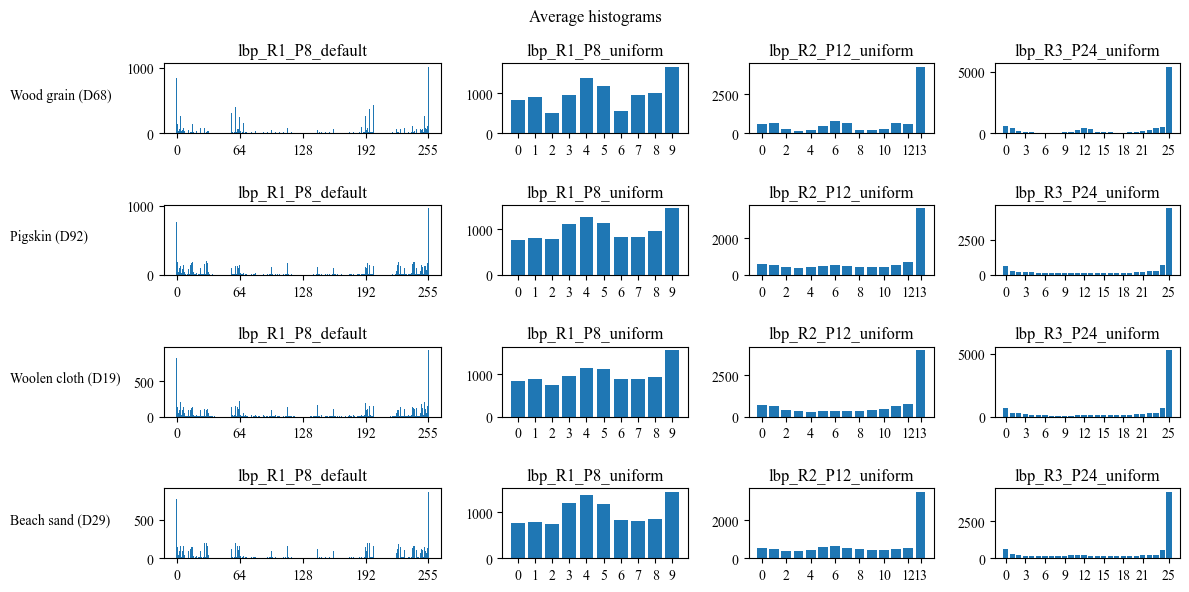

In [36]:
fig, axs = plt.subplots(4,5, width_ratios=[1, 3,2,2,2])
for i,ar in zip(range(100), axs):
    ax = ar[0]
    ax.text(0, 0.5, unique_labels[example_classes[i]], rotation='horizontal')
    ax.set_axis_off()

    ax = ar[1]
    ax.bar(range(256), featured_means[0][example_classes[i]])
    ax.set_title('lbp_R1_P8_default')
    ax.set_xticks(list(range(0,256,64)) + [255])


    ax = ar[2]
    ax.bar(range(10), featured_means[1][example_classes[i]])
    ax.set_title('lbp_R1_P8_uniform')
    ax.set_xticks(range(10))

    ax = ar[3]
    ax.bar(range(14), featured_means[2][example_classes[i]])
    ax.set_title('lbp_R2_P12_uniform')
    ax.set_xticks(list(range(0,14,2)) + [13])

    ax = ar[4]
    ax.bar(range(26), featured_means[3][example_classes[i]])
    ax.set_title('lbp_R3_P24_uniform')
    ax.set_xticks(list(range(0,24,3)) + [25])

fig.suptitle("Average histograms")
fig.set_size_inches(12,6)
fig.tight_layout(h_pad=2, w_pad=0)
fig.savefig('example_means.png', dpi=120, bbox_inches='tight')

In [45]:
((y_tex == 3) & (y_set == 3)).sum()

np.int64(100)

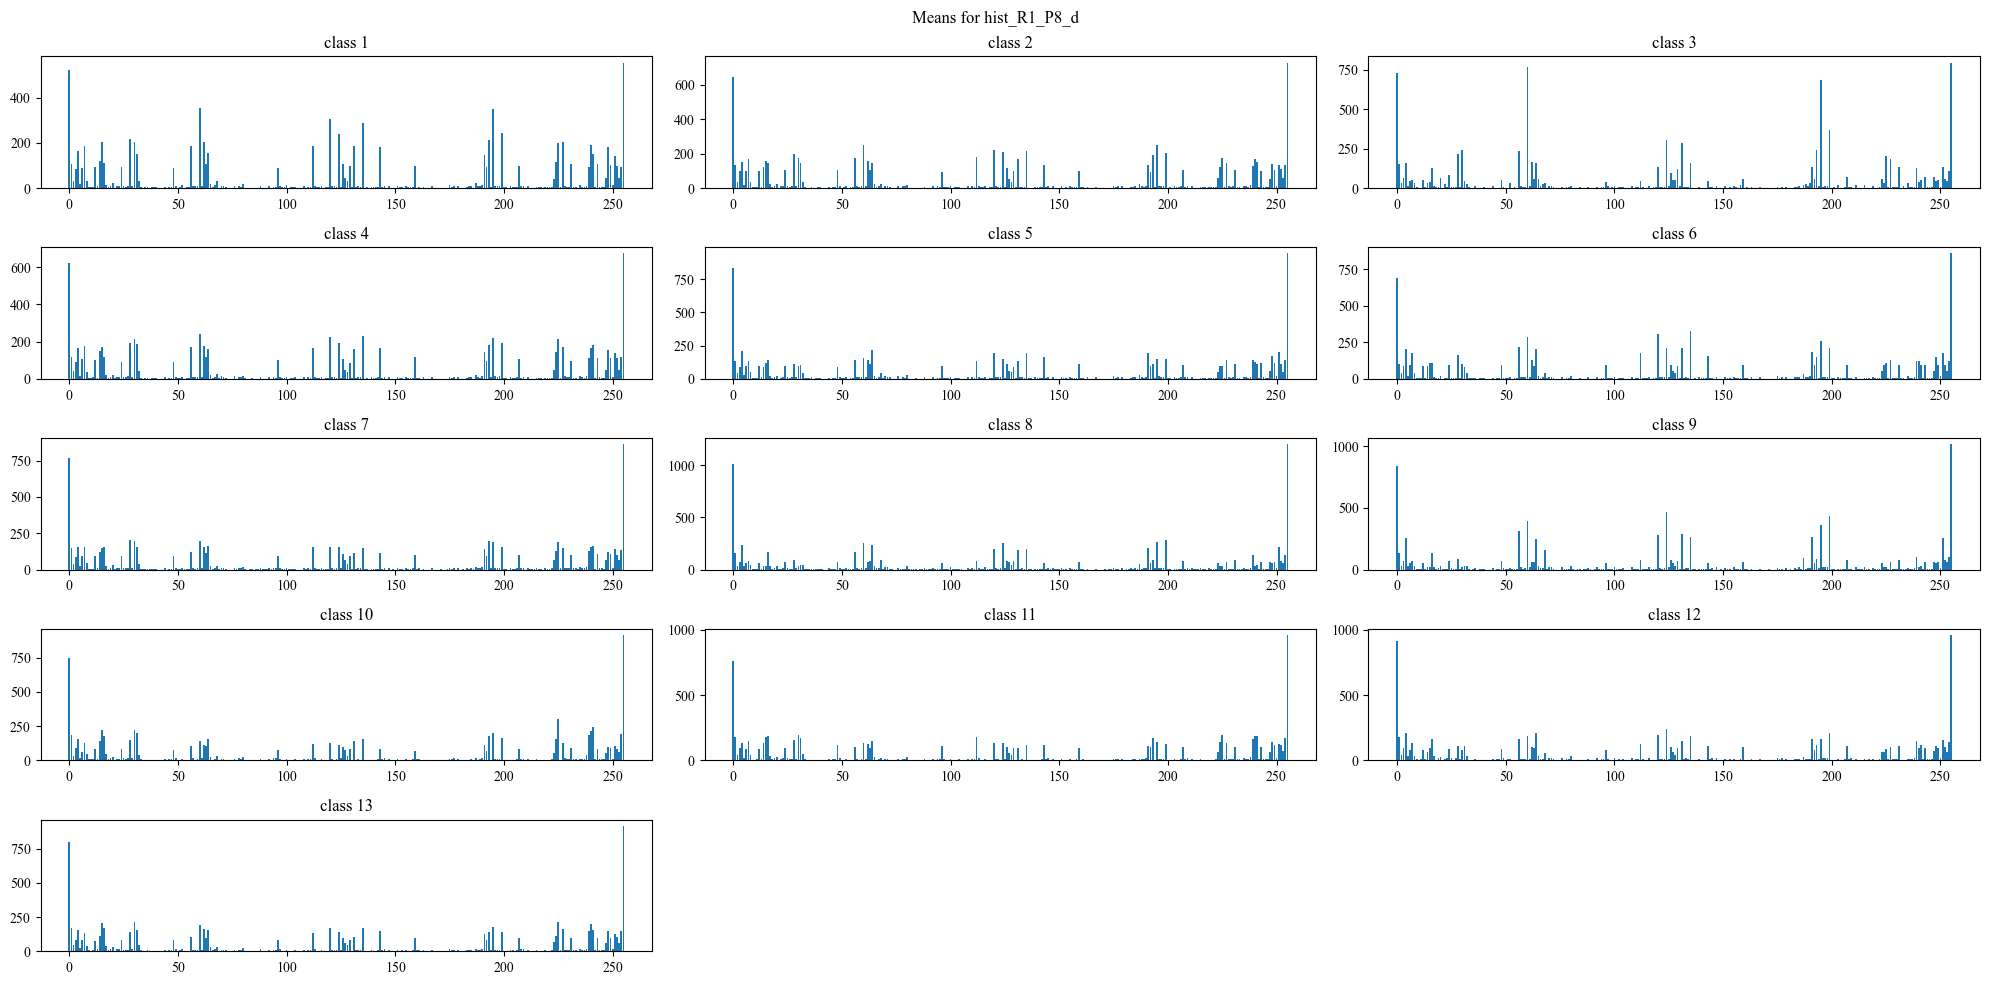

In [75]:
fig, axs = plt.subplots(5, 3)
for k in range(13):
    ax = axs.flat[k]
    ax.bar(range(means.shape[1]), means[k])
    ax.set_title(f'class {k+1}')

axs.flat[13].axis('off')
axs.flat[14].axis('off')

fig.suptitle(f'Means for {fname}')
fig.set_size_inches((20,10))
fig.tight_layout()
fig.savefig(f'{fname}.png', dpi=150, bbox_inches='tight')

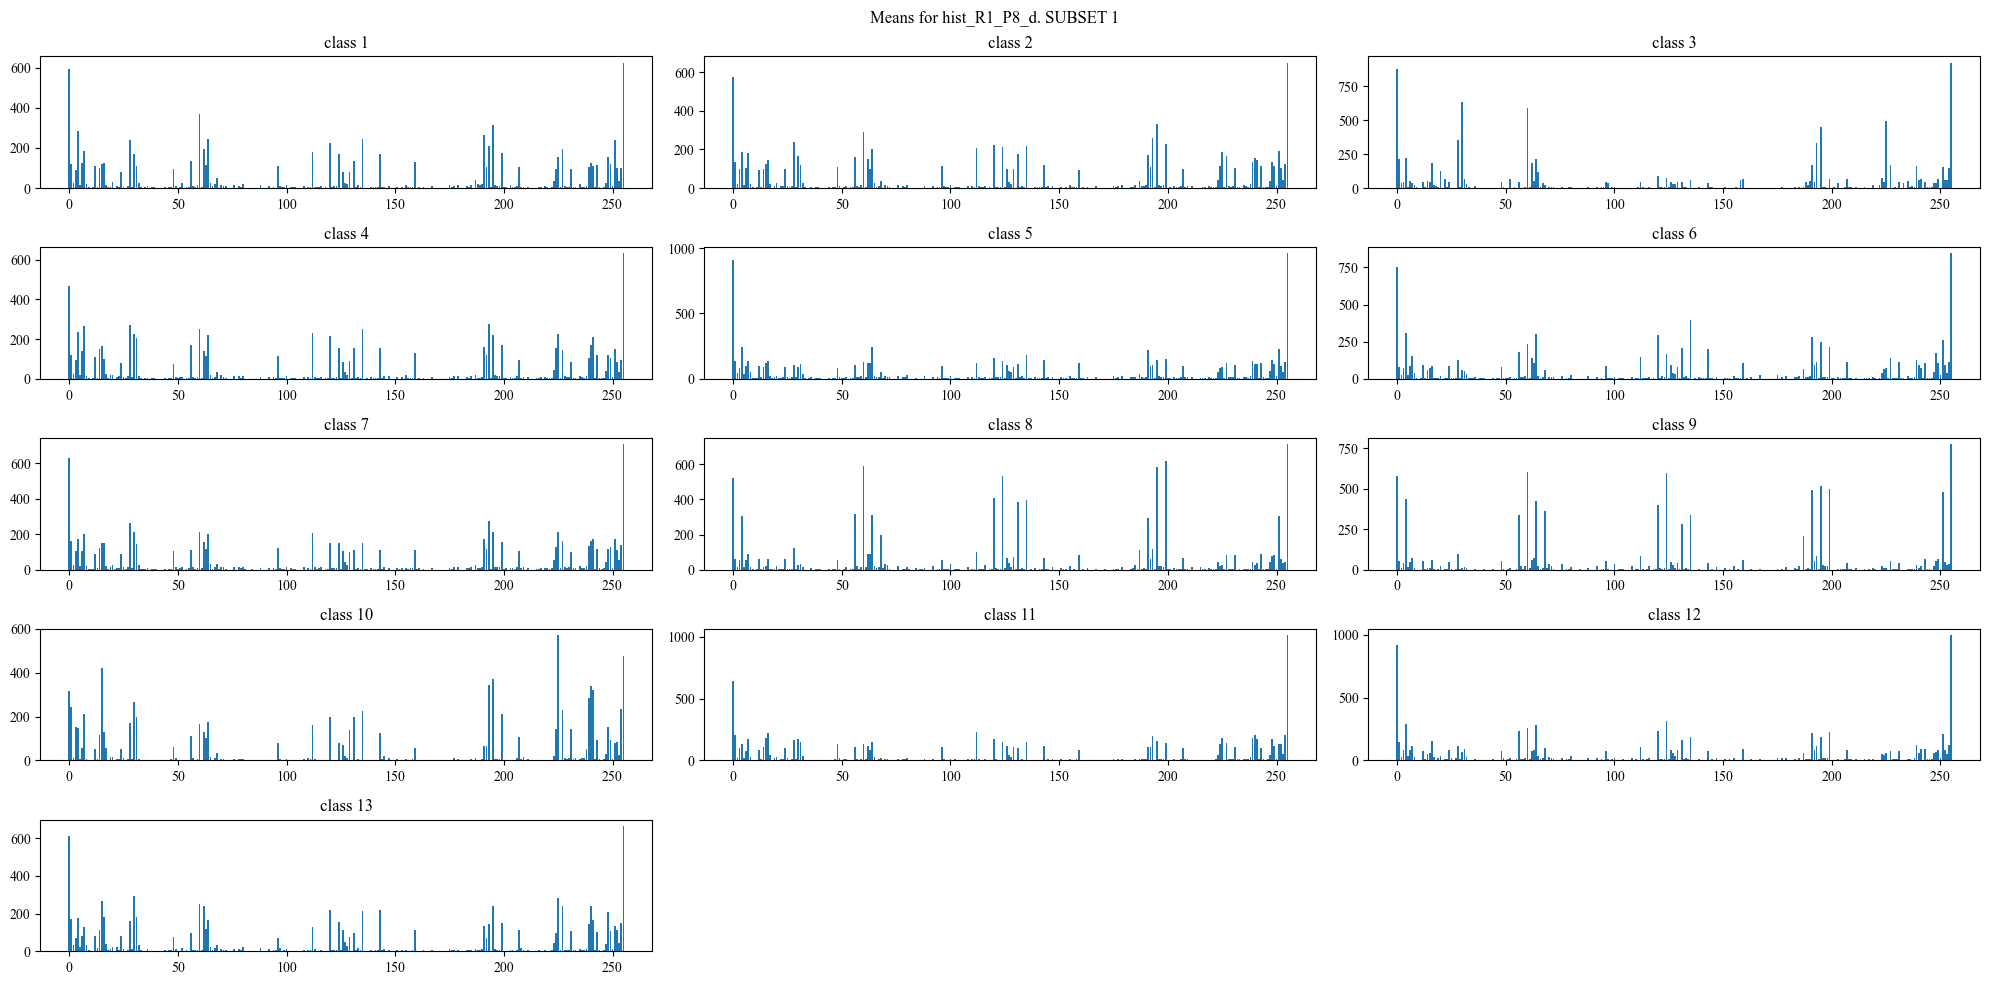

In [76]:
X1 = X[y_set == 1]
y_tex1 = y_tex[y_set == 1]
X1_cl = np.array([ X1[y_tex1 == k] for k in unique_texs ])
means1 = X1_cl.mean(axis=1)

fig, axs = plt.subplots(5, 3)
for k in range(13):
    ax = axs.flat[k]
    ax.bar(range(means1.shape[1]), means1[k])
    ax.set_title(f'class {k+1}')

axs.flat[13].axis('off')
axs.flat[14].axis('off')

fig.suptitle(f'Means for {fname}. SUBSET 1')
fig.set_size_inches((20,10))
fig.tight_layout()
fig.savefig(f'{fname}-subset1.png', dpi=150, bbox_inches='tight')

# Plot precision

In [79]:
precisions_1 = [0.81, 0.50, 0.59, 0.55, 0.60, 0.61, 0.80, 0.81]
precisions_knn = [0.98, 0.95, 0.98, 0.98, 0.97, 0.93, 0.97, 0.97]

precisions_1_12 = [0.86, 0.85, 0.26, 0.85, 0.87, 0.89, 0.95, 0.97]
precisions_1_13 = [0.23, 0.07, 0.00, 0.13, 0.07, 0.09, 0.15, 0.36]

precisions_knn_12 = [0.98, 0.91, 0.99, 0.96, 0.91, 0.75, 0.99, 0.99]
precisions_knn_13 = [.24,  .19,  .20,  .16,  .06,  .14,  .31,  .27]


In [89]:
def bar_precision(prec, title, plotname):
    fig = plt.figure()
    plt.barh(feature_names, prec, height=0.6, color='tab:blue')
    plt.gca().set_axisbelow(True)
    plt.grid(axis='x', color='k', linewidth=0.5)
    plt.title(title)
    ticks = list(np.linspace(0,1,6))
    plt.xticks(ticks + [ 0.1 ], [ f"{t*100:.0f}%" for t in ticks] + [ "10%" ]);
    plt.xlim(0,1.03)
    plt.savefig(f'precision/prec_{plotname}.png', dpi=120, bbox_inches='tight')
    plt.close(fig)

In [91]:
bar_precision(precisions_1,      "Classification precision\nKL-div classifier",             "1")
bar_precision(precisions_1_12,   "Classification precision\nKL-div trained on 1 tested on 2", "1_12")
bar_precision(precisions_1_13,   "Classification precision\nKL-div trained on 1 tested on 3", "1_13")
bar_precision(precisions_knn,    "Classification precision\nKNN classifier",                "knn")
bar_precision(precisions_knn_12, "Classification precision\nKNN trained on 1 tested on 2",    "knn_12")
bar_precision(precisions_knn_13, "Classification precision\nKNN trained on 1 tested on 3",    "knn_13")